<a href="https://colab.research.google.com/github/juanazorzolo/PROYECTO-ANALISIS-DE-DATOS-SOLREPUESTOS/blob/main/analisis_datos_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de datos e importaciones

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Carga de archivos
ventas = pd.read_csv("datos_ventas_marzo_mayo.csv")
stock = pd.read_csv("datos_stock.csv", encoding='utf-8')  # Usar 'latin1' si ves caracteres raros

# Ventas

In [24]:
ventas.head()

,FECHA,MARCA,MODELO,CATEGORIA,PRODUCTO,CANTIDAD,PRECIO UNITARIO,TOTAL
0,2025-03-07,Mitsubishi,Sportage,Filtros,Filtro de aire,4,13081,52324
1,2025-03-24,Kia,Impreza,Baterías,Batería 12V 60Ah,1,3350,3350
2,2025-05-26,Mitsubishi,Sportage,Frenos,Discos de freno,4,10736,42944
3,2025-03-26,Suzuki,Impreza,Motor,Correa de distribución,5,9705,48525
4,2025-03-20,Subaru,Sportage,Motor,Bujía,4,8714,34856


## Análisis exploratorio y preprocesamiento

In [25]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FECHA            150 non-null    object
 1   MARCA            150 non-null    object
 2   MODELO           150 non-null    object
 3   CATEGORIA        150 non-null    object
 4   PRODUCTO         150 non-null    object
 5   CANTIDAD         150 non-null    int64 
 6   PRECIO UNITARIO  150 non-null    int64 
 7   TOTAL            150 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 9.5+ KB


In [26]:
# Convertir la columna FECHA a formato datetime
ventas['FECHA'] = pd.to_datetime(ventas['FECHA'])

## Análisis y visualización de información valiosa para el comercio

### Productos de alta rotación vs baja rotación
Objetivo: Identificar cuáles productos se mueven rápido y cuáles están “quietos”

In [39]:
productos_mas_vendidos = ventas.groupby('PRODUCTO')['CANTIDAD'].sum().sort_values(ascending=False)
productos_mas_vendidos.head()

,CANTIDAD
PRODUCTO,
Filtro de combustible,54
Pastillas de freno,51
Correa de distribución,50
Filtro de aire,46
Discos de freno,44


In [29]:
rotacion = ventas.groupby('PRODUCTO')['CANTIDAD'].sum().reset_index()
rotacion = rotacion.sort_values(by='CANTIDAD', ascending=False)

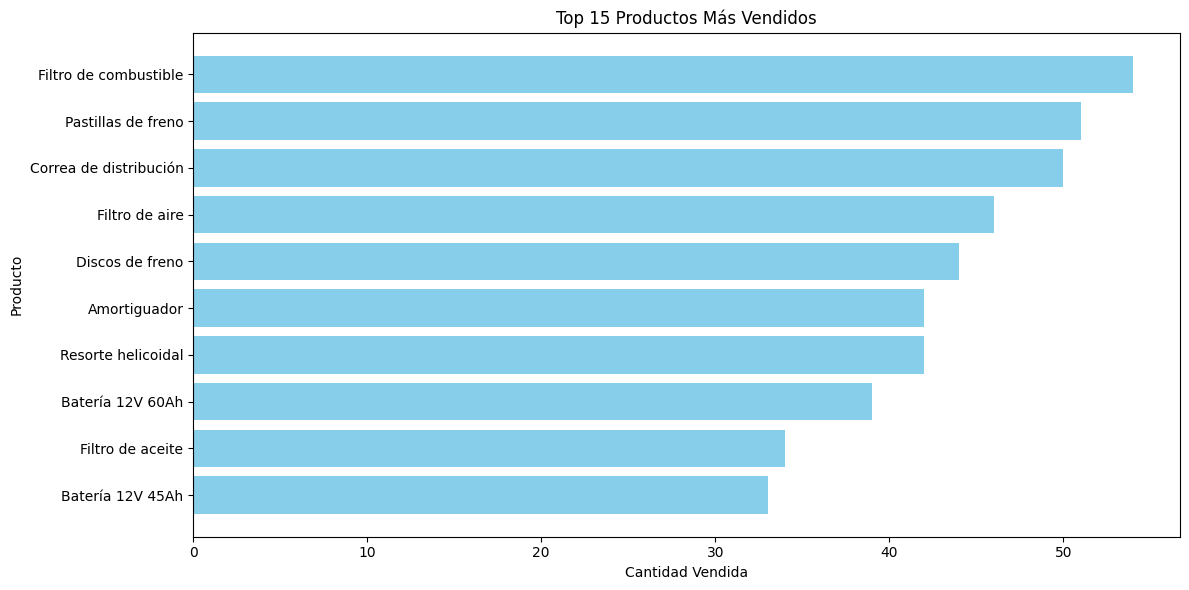

In [54]:
# Visualización de los 15 productos más vendidos
top_productos = rotacion.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_productos['PRODUCTO'], top_productos['CANTIDAD'], color='skyblue')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.title('Top 15 Productos Más Vendidos')
plt.gca().invert_yaxis()  # Para que el más vendido quede arriba
plt.tight_layout()
plt.show()

### Pieza más vendida

Objetivo: ver posibles debilidades comunes por vehículopiezas que más se rompen.

In [40]:
pieza_mas_vendida = ventas.groupby(['MARCA', 'MODELO', 'PRODUCTO'])['CANTIDAD'].sum().sort_values(ascending=False)
pieza_mas_vendida.head()

MARCA       MODELO    PRODUCTO             
Honda       Swift     Filtro de combustible    11
Mitsubishi  Lancer    Filtro de aceite          9
Subaru      Impreza   Batería 12V 45Ah          8
Mitsubishi  Swift     Resorte helicoidal        7
            Sportage  Filtro de aire            6
Name: CANTIDAD, dtype: int64

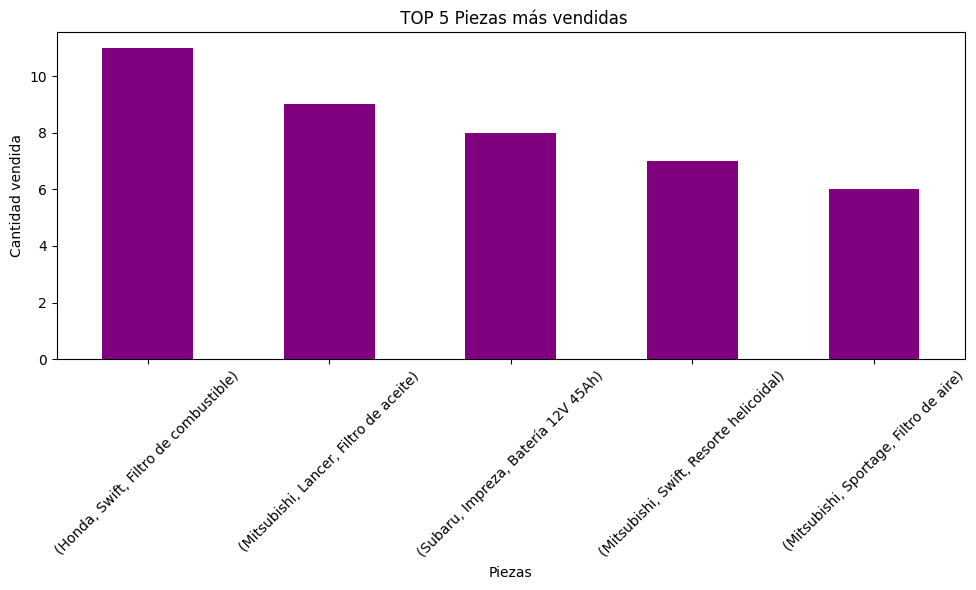

In [53]:
#grafico pieza_mas_vendida
plt.figure(figsize=(10, 6))
pieza_mas_vendida.head(5).plot(kind='bar', color='purple')
plt.title(" TOP 5 Piezas más vendidas")
plt.ylabel("Cantidad vendida")
plt.xlabel("Piezas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comparativa de marcas en ventas totales
Objetivo: Ver cuál marca genera más ingresos

In [31]:
ventas_marca = ventas.groupby('MARCA')['TOTAL'].sum().sort_values(ascending=False)

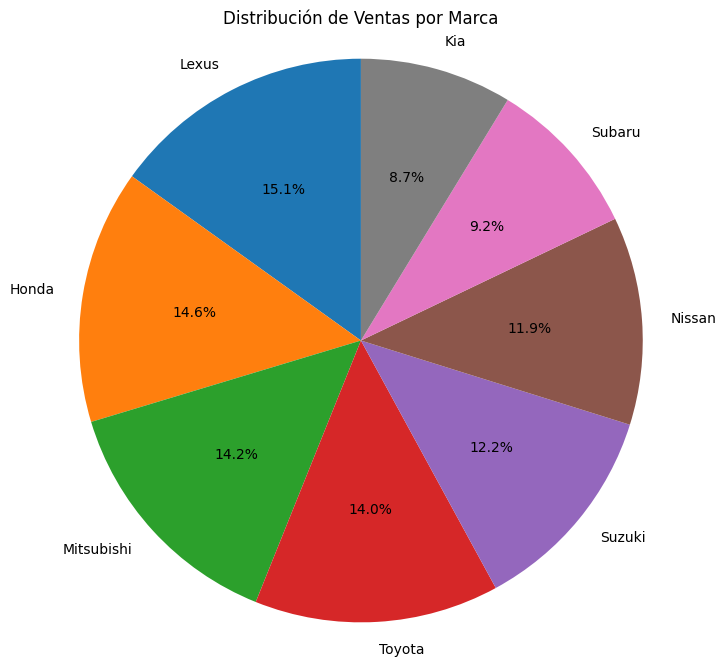

In [32]:
# Gráfico de tortas para ventas_marca
plt.figure(figsize=(8, 8))
plt.pie(ventas_marca, labels=ventas_marca.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Ventas por Marca')
plt.axis('equal')  # Para que sea una torta perfecta
plt.show()

### Análisis temporal de la demanda
Objetivo: Saber qué meses resultaron mejores en cuanto a ventas.

In [43]:
ventas['MES'] = ventas['FECHA'].dt.to_period('M')
ventas_por_mes = ventas.groupby('MES')['TOTAL'].sum()
ventas_por_mes.head()

,TOTAL
MES,
2025-03,1314875
2025-04,1749419
2025-05,1349704


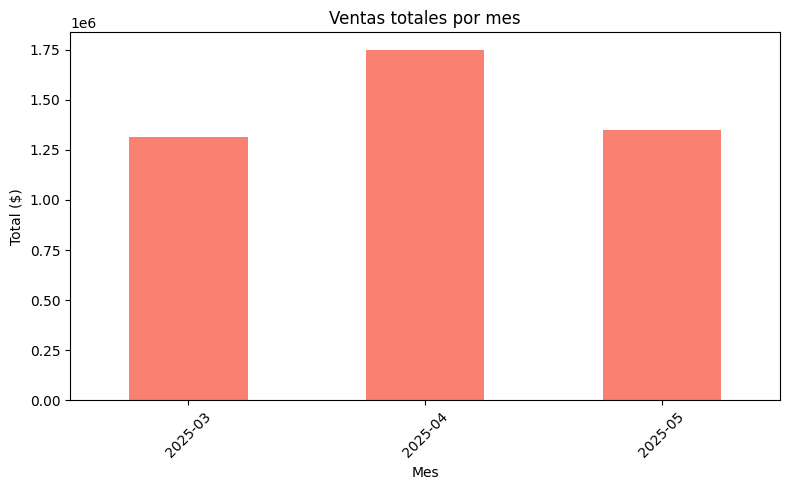

In [44]:
# Ventas por mes
plt.figure(figsize=(8, 5))
ventas_por_mes.plot(kind='bar', color='salmon')
plt.title("Ventas totales por mes")
plt.ylabel("Total ($)")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ventas por días de semana

Objetivo: Saber qué día de la semana resulta con mayor actividad  para ajustar promociones y recursos.

In [41]:
ventas['DIA_SEMANA'] = ventas['FECHA'].dt.day_name()
ventas_por_dia = ventas.groupby('DIA_SEMANA')['TOTAL'].sum().sort_values()

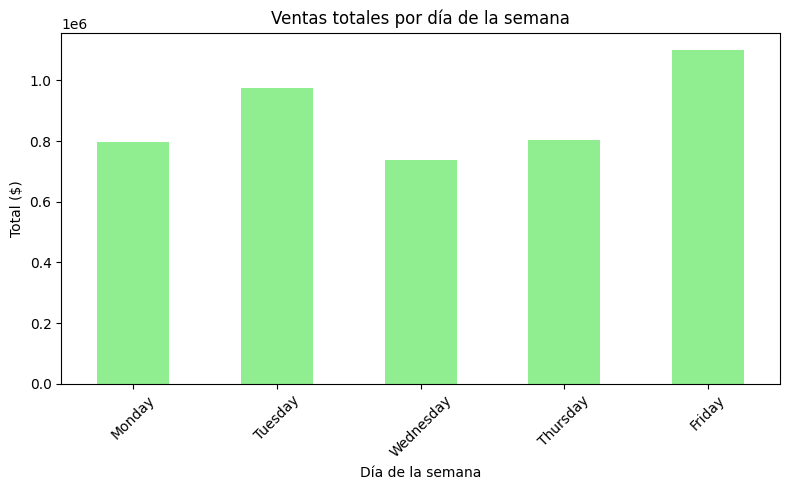

In [49]:
# Gráfico para ventas_por_dia con los dias de monday a friday ordenados
plt.figure(figsize=(8, 5))
ventas_por_dia[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].plot(kind='bar', color='lightgreen')
plt.title("Ventas totales por día de la semana")
plt.ylabel("Total ($)")
plt.xlabel("Día de la semana")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stock

In [ ]:
stock.head()

,MARCA,MODELO,CATEGORIA,PRODUCTO,CANTIDAD,PRECIO UNITARIO
0,Toyota,Civic,Filtros,Filtro de aire,21,9579
1,Toyota,Civic,Filtros,Filtro de combustible,1,9829
2,Toyota,Civic,Motor,Bujía,19,12013
3,Toyota,Corolla,Filtros,Filtro de aire,24,5902
4,Toyota,Corolla,Filtros,Filtro de combustible,20,6410


## Análisis exploratorio y preprocesamiento

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MARCA            154 non-null    object
 1   MODELO           154 non-null    object
 2   CATEGORIA        154 non-null    object
 3   PRODUCTO         154 non-null    object
 4   CANTIDAD         154 non-null    int64 
 5   PRECIO UNITARIO  154 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.3+ KB


## Análisis y visualización de información valiosa para el comercio

### Productos con stock crítico o agotado

Objetivo: Detectar productos que se venden mucho y tienen poco stock → ayuda para reposición.

In [74]:
stock_critico = stock[stock['CANTIDAD'] < 3]

<Figure size 1000x600 with 0 Axes>

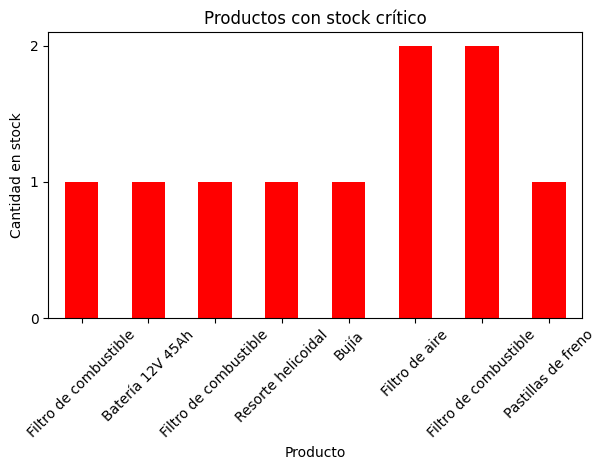

In [75]:
import matplotlib.ticker as mtick
# Grafico de barras para stock_critico
plt.figure(figsize=(10, 6))
ax = stock_critico.plot(kind='bar', x='PRODUCTO', y='CANTIDAD', color='red', legend=False)
plt.title("Productos con stock crítico")
plt.ylabel("Cantidad en stock")
plt.xlabel("Producto")
plt.xticks(rotation=45)
plt.tight_layout()

# Ajustar ticks del eje Y para que sean enteros
ax.yaxis.set_major_locator(mtick.MaxNLocator(integer=True))

plt.show()

### Rentabilidad del producto (ganancia)

Objetivo: Saber qué productos dejan más ganancia.

    Cálculo: GANANCIA = (PRECIO UNITARIO VENTA - PRECIO UNITARIO STOCK) * CANTIDAD

In [82]:
ventas_stock = pd.merge(ventas, stock, on=['MARCA', 'MODELO', 'CATEGORIA', 'PRODUCTO'], suffixes=('_VENTA', '_STOCK'))
ventas_stock['GANANCIA'] = (ventas_stock['PRECIO UNITARIO_VENTA'] - ventas_stock['PRECIO UNITARIO_STOCK']) * ventas_stock['CANTIDAD_VENTA']

In [81]:
print(ventas_stock.columns)

Index(['FECHA', 'MARCA', 'MODELO', 'CATEGORIA', 'PRODUCTO', 'CANTIDAD_VENTA',
       'PRECIO UNITARIO_VENTA', 'TOTAL', 'MES', 'DIA', 'DIA_SEMANA',
       'CANTIDAD_STOCK', 'PRECIO UNITARIO_STOCK'],
      dtype='object')


In [83]:
ventas_stock.head()

,FECHA,MARCA,MODELO,CATEGORIA,PRODUCTO,CANTIDAD_VENTA,PRECIO UNITARIO_VENTA,TOTAL,MES,DIA,DIA_SEMANA,CANTIDAD_STOCK,PRECIO UNITARIO_STOCK,GANANCIA
0,2025-03-20,Subaru,Sportage,Motor,Bujía,4,8714,34856,2025-03,Thursday,Thursday,24,12126,-13648
1,2025-05-02,Subaru,Swift,Filtros,Filtro de aceite,5,10204,51020,2025-05,Friday,Friday,19,4291,29565
2,2025-04-10,Subaru,Corolla,Motor,Correa de distribución,3,5758,17274,2025-04,Thursday,Thursday,26,11979,-18663
3,2025-05-16,Honda,Corolla,Baterías,Batería 12V 45Ah,4,14504,58016,2025-05,Friday,Friday,10,8845,22636
4,2025-04-25,Nissan,Civic,Suspensión,Amortiguador,1,6396,6396,2025-04,Friday,Friday,15,11634,-5238


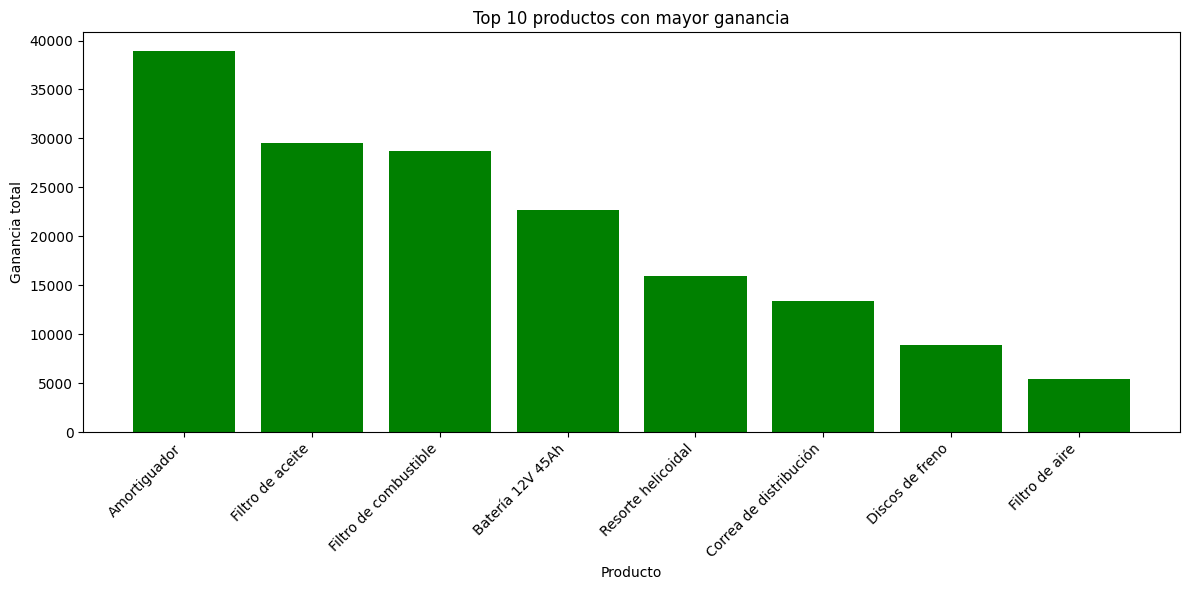

In [84]:
# Ordenamos de mayor a menor ganancia
ganancia_ordenada = ventas_stock.sort_values(by='GANANCIA', ascending=False)

# top 10 productos más rentables
top_10 = ganancia_ordenada.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10['PRODUCTO'], top_10['GANANCIA'], color='green')
plt.title('Top 10 productos con mayor ganancia')
plt.xlabel('Producto')
plt.ylabel('Ganancia total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

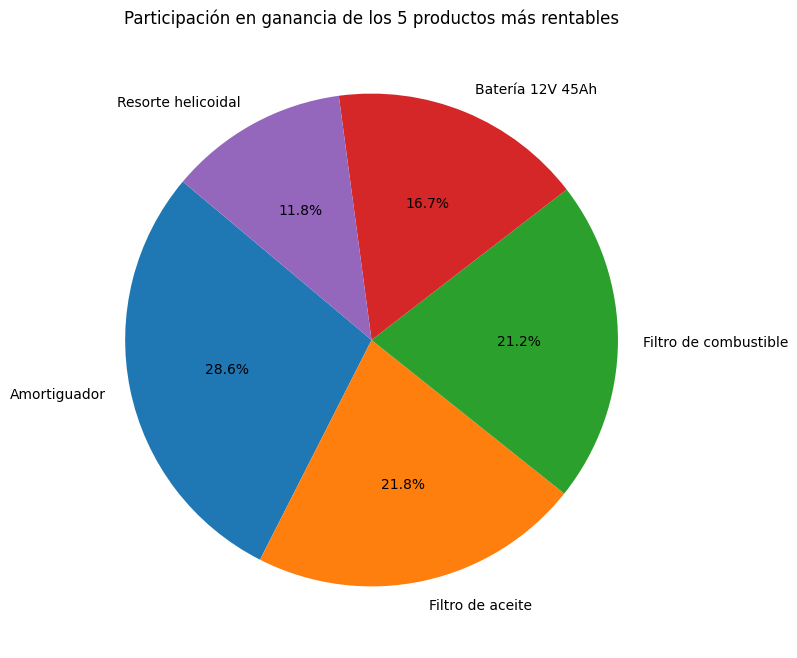

In [85]:
# Gráfico de pastel para ver en porcentajes
top_5 = ganancia_ordenada.head(5)
plt.figure(figsize=(8,8))
plt.pie(top_5['GANANCIA'], labels=top_5['PRODUCTO'], autopct='%1.1f%%', startangle=140)
plt.title('Participación en ganancia de los 5 productos más rentables')
plt.show()

### Desbalance entre stock y ventas

Objetivo: Detectar productos que no tienen ventas, o que tienen ventas pero no stock.

In [77]:
productos_sin_ventas = stock[~stock['PRODUCTO'].isin(ventas['PRODUCTO'])]
productos_sin_stock = ventas[~ventas['PRODUCTO'].isin(stock['PRODUCTO'])]

In [90]:
if productos_sin_ventas.empty:
    productos_sin_ventas.head()
    print("No hay productos sin ventas para graficar.")
else:
    plt.figure(figsize=(10, 6))
    ax = productos_sin_ventas.plot(kind='bar', x='PRODUCTO', y='CANTIDAD_VENTA', color='orange', legend=False)
    plt.title("Productos sin ventas")
    plt.ylabel("Cantidad vendida")
    plt.xlabel("Producto")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

No hay productos sin ventas para graficar.


In [88]:
if productos_sin_stock.empty:
    productos_sin_stock.head()
    print("No hay productos sin stock para graficar.")
else:
    plt.figure(figsize=(10, 6))
    ax = productos_sin_stock.plot(kind='bar', x='PRODUCTO', y='CANTIDAD_VENTA', color='orange', legend=False)
    plt.title("Productos sin stock")
    plt.ylabel("Cantidad vendida")
    plt.xlabel("Producto")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

No hay productos sin stock para graficar.
